In [1]:
%matplotlib inline
import json
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import skimage.io
import seaborn as sns
from collections import defaultdict
from pylab import box
from matplotlib.patches import Patch

ann = json.load(open('./annotations/instances_val2014.json'))
img2ins = defaultdict(list)
for i, ins in enumerate(ann['annotations']):
    img2ins[ins['image_id']].append(i)

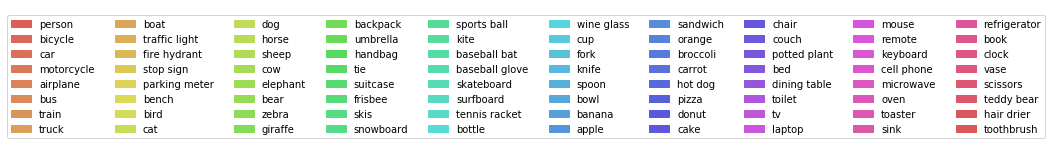

In [2]:
colors = sns.hls_palette(90)
legend_handles = []
catid2name = dict()
for cat in ann['categories']:
    #print(cat['id'], cat['name'])
    legend_handles.append(Patch(color=colors[cat['id']-1], label=cat['name']))
    catid2name[cat['id']] = cat['name']

fig = plt.figure(figsize=(3, 1))
ax = fig.add_subplot(111)
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
box('off')
plt.legend(handles=legend_handles, ncol=10)
plt.tight_layout()
plt.show()

In [3]:
def explore(index):
    index = 3  # for debug
    img_path = './val2014/' + ann['images'][index]['file_name']
    img_id = ann['images'][index]['id']
    img = skimage.io.imread(img_path)

    print(index, img_id)
    print(img_path)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    for ins_index in img2ins[img_id]:
        seg = ann['annotations'][ins_index]['segmentation'][0]
        cat_id = ann['annotations'][ins_index]['category_id']
        seg = np.array(seg).reshape((int(len(seg)/2), 2))
        poly = plt.Polygon(seg, alpha=0.5, fc=colors[cat_id])
        ax.add_patch(poly)
    ax.tick_params(labelbottom="off", bottom="off")
    ax.tick_params(labelleft="off", left="off")
    plt.imshow(img)
    plt.draw()
    
interact(explore, index=(0, len(ann['images'])))

interactive(children=(IntSlider(value=20252, description='index', max=40504), Output()), _dom_classes=('widget-interact',))

<function __main__.explore>

In [4]:
img_index = 3
img_path = './val2014/' + ann['images'][img_index]['file_name']
img_id = ann['images'][img_index]['id']
img = skimage.io.imread(img_path)

def view_instance(index):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ins_index = img2ins[img_id][index]
    seg = ann['annotations'][ins_index]['segmentation'][0]
    cat_id = ann['annotations'][ins_index]['category_id']
    print(ins_index, catid2name[cat_id])
    seg = np.array(seg).reshape((int(len(seg)/2), 2))
    poly = plt.Polygon(seg, alpha=0.5, fc=colors[cat_id])
    ax.add_patch(poly)
    ax.tick_params(labelbottom="off", bottom="off")
    ax.tick_params(labelleft="off", left="off")
    plt.imshow(img)
    plt.draw()

interact(view_instance, index=(0, len(img2ins[img_id])-1))

interactive(children=(IntSlider(value=5, description='index', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.view_instance>

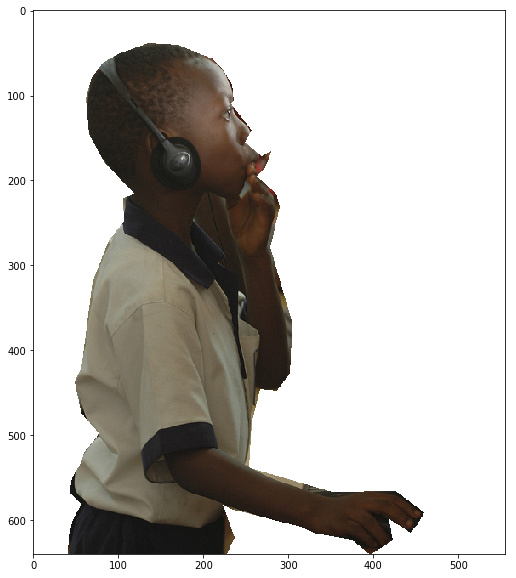

In [5]:
from skimage.draw import polygon, polygon_perimeter

def makeMask(img, seg):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    rr, cc = polygon(seg[:, 1], seg[:, 0], shape=img.shape)
    mask[rr, cc] = 1
    rr, cc = polygon_perimeter(seg[:, 1], seg[:, 0], shape=img.shape)
    mask[rr, cc] = 1
    return mask

img_index = 3
ins_index = 9605
img_path = './val2014/' + ann['images'][img_index]['file_name']
img = skimage.io.imread(img_path)
seg = ann['annotations'][ins_index]['segmentation'][0]
seg = np.array(seg).reshape((int(len(seg)/2), 2))
mask = makeMask(img, seg)
out = np.ones(img.shape, dtype=np.uint8) * 255
out[np.where(mask == 1)] = img[np.where(mask == 1)]
fig = plt.figure(figsize=(10, 10))
plt.imshow(out)